<a href="https://colab.research.google.com/github/ZIZOUTOUMOU/ZIZOUTOUMOU/blob/main/cal_paralle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install mpi4py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.8 MB/s eta 0:00:00


In [12]:
pip install mpi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 3.1 MB/s eta 0:00:00


Run 1: 0.4210 seconds
Run 2: 0.4162 seconds
Run 3: 0.2692 seconds
Run 4: 0.2920 seconds
Run 5: 0.3149 seconds
Run 6: 0.2258 seconds
Run 7: 0.2268 seconds
Run 8: 0.2230 seconds
Run 9: 0.2243 seconds
Run 10: 0.2447 seconds
Mean Sequential Time = 0.2857764482498169


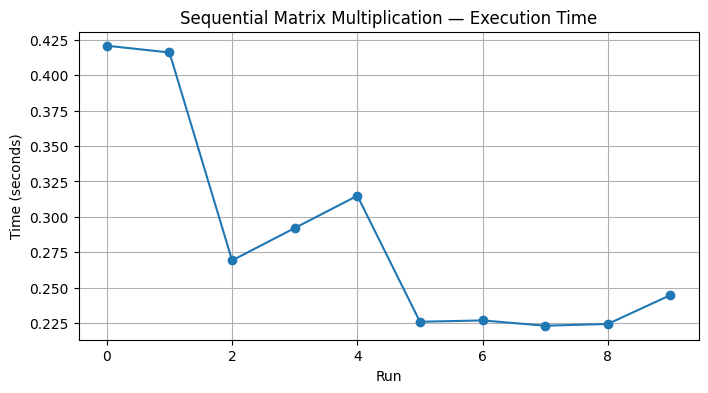

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt

N = 80

def matmul_sequential(A, B):
    C = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            s = 0
            for k in range(N):
                s += A[i, k] * B[k, j]
            C[i, j] = s
    return C

A = np.random.rand(N, N)
B = np.random.rand(N, N)

times = []

for run in range(10):
    t0 = time.time()
    C = matmul_sequential(A, B)
    t1 = time.time()
    times.append(t1 - t0)
    print(f"Run {run+1}: {t1 - t0:.4f} seconds")

mean_time = sum(times) / len(times)
print("Mean Sequential Time =", mean_time)

# PLOT
plt.figure(figsize=(8,4))
plt.plot(times, marker='o')
plt.title("Sequential Matrix Multiplication — Execution Time")
plt.xlabel("Run")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()



===== 2 Threads =====
Run 1: 0.0341 sec
Run 2: 0.0348 sec
Run 3: 0.0356 sec
Run 4: 0.0332 sec
Run 5: 0.0352 sec
Run 6: 0.0227 sec
Run 7: 0.0240 sec
Run 8: 0.0265 sec
Run 9: 0.0274 sec
Run 10: 0.0321 sec
➡ Mean Time for 2 threads = 0.0306 sec

===== 3 Threads =====
Run 1: 0.0393 sec
Run 2: 0.0602 sec
Run 3: 0.0605 sec
Run 4: 0.0551 sec
Run 5: 0.0429 sec
Run 6: 0.0316 sec
Run 7: 0.0449 sec
Run 8: 0.0508 sec
Run 9: 0.0403 sec
Run 10: 0.0592 sec
➡ Mean Time for 3 threads = 0.0485 sec

===== 4 Threads =====
Run 1: 0.0562 sec
Run 2: 0.0534 sec
Run 3: 0.0527 sec
Run 4: 0.0631 sec
Run 5: 0.0548 sec
Run 6: 0.0505 sec
Run 7: 0.0621 sec
Run 8: 0.0628 sec
Run 9: 0.0309 sec
Run 10: 0.0210 sec
➡ Mean Time for 4 threads = 0.0508 sec

===== 6 Threads =====
Run 1: 0.0294 sec
Run 2: 0.0414 sec
Run 3: 0.0691 sec
Run 4: 0.0624 sec
Run 5: 0.0548 sec
Run 6: 0.0523 sec
Run 7: 0.0667 sec
Run 8: 0.0599 sec
Run 9: 0.0555 sec
Run 10: 0.0627 sec
➡ Mean Time for 6 threads = 0.0554 sec

===== 12 Threads =====
Run 

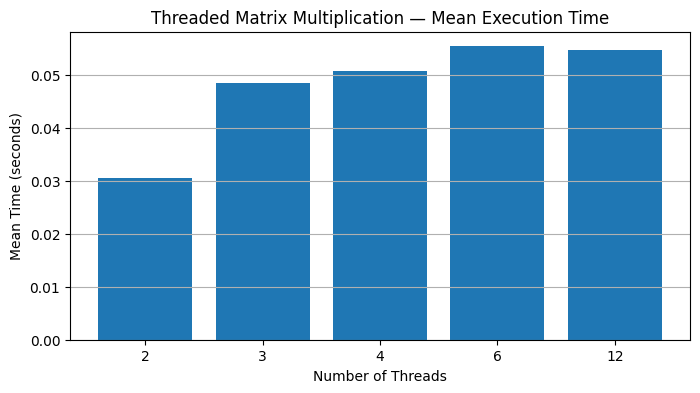

In [1]:
import numpy as np
import threading
import time
import matplotlib.pyplot as plt

N = 80

def worker(A, B, C, start, end):
    for i in range(start, end):
        for j in range(N):
            C[i, j] = np.dot(A[i, :], B[:, j])

def matmul_threaded(A, B, nthreads):
    C = np.zeros((N, N))
    threads = []
    chunk = N // nthreads

    for t in range(nthreads):
        s = t * chunk
        e = N if t == nthreads - 1 else (t+1)*chunk
        thr = threading.Thread(target=worker, args=(A,B,C,s,e))
        threads.append(thr)
        thr.start()

    for thr in threads:
        thr.join()

    return C

A = np.random.rand(N, N)
B = np.random.rand(N, N)

thread_list = [2, 3, 4, 6, 12]
thread_times = []

for nt in thread_list:
    print(f"\n===== {nt} Threads =====")
    runs = []
    for i in range(10):
        t0 = time.time()
        C = matmul_threaded(A, B, nt)
        t1 = time.time()
        runs.append(t1 - t0)
        print(f"Run {i+1}: {t1 - t0:.4f} sec")

    mean_t = sum(runs) / len(runs)
    thread_times.append(mean_t)
    print(f"➡ Mean Time for {nt} threads = {mean_t:.4f} sec")

# PLOT MEAN EXECUTION TIMES
plt.figure(figsize=(8,4))
plt.bar([str(n) for n in thread_list], thread_times)
plt.title("Threaded Matrix Multiplication — Mean Execution Time")
plt.ylabel("Mean Time (seconds)")
plt.xlabel("Number of Threads")
plt.grid(axis='y')
plt.show()



Run 1: 0.1081 sec
Run 2: 0.1054 sec
Run 3: 0.1421 sec
Run 4: 0.1094 sec
Run 5: 0.1204 sec
Run 6: 0.1261 sec
Run 7: 0.0884 sec
Run 8: 0.0977 sec
Run 9: 0.1349 sec
Run 10: 0.0538 sec
Mean MPI Time = 0.10861876010894775


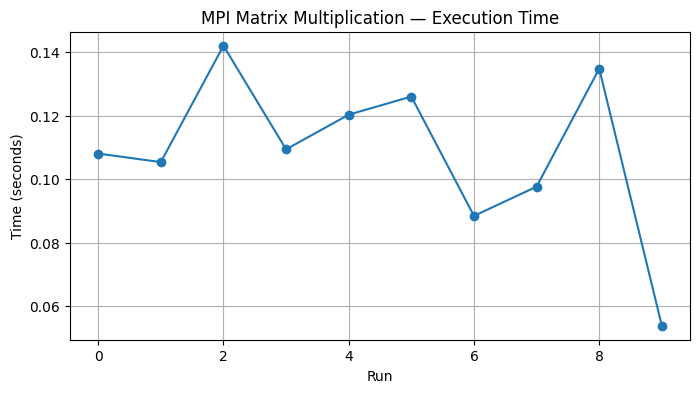

In [15]:
from mpi4py import MPI
import numpy as np
import time
import matplotlib.pyplot as plt

N = 800

def matmul_mpi():
    comm = MPI.COMM_WORLD
    rank = comm.Get_rank()
    size = comm.Get_size()

    if rank == 0:
        A = np.random.rand(N,N)
        B = np.random.rand(N,N)
    else:
        A = None
        B = np.empty((N,N))

    comm.Bcast(B, root=0)

    rows = N // size
    start = rank * rows
    end = N if rank == size - 1 else (rank+1)*rows

    A_local = np.zeros((end-start, N))

    if rank == 0:
        for p in range(size):
            s = p * rows
            e = N if p == size - 1 else (p+1)*rows
            if p == 0:
                A_local[:] = A[s:e,:]
            else:
                comm.Send(A[s:e,:], dest=p)
    else:
        comm.Recv(A_local, source=0)

    C_local = A_local @ B

    if rank == 0:
        C = np.zeros((N,N))
        C[start:end,:] = C_local
        for p in range(1,size):
            s = p * rows
            e = N if p == size - 1 else (p+1)*rows
            comm.Recv(C[s:e,:], source=p)
        return C
    else:
        comm.Send(C_local, dest=0)
        return None


comm = MPI.COMM_WORLD
rank = comm.Get_rank()
times = []

for i in range(10):
    comm.Barrier()
    t0 = time.time()
    C = matmul_mpi()
    comm.Barrier()
    t = time.time() - t0
    if rank == 0:
        times.append(t)
        print(f"Run {i+1}: {t:.4f} sec")

if rank == 0:
    mean_time = sum(times)/len(times)
    print("Mean MPI Time =", mean_time)
plt.figure(figsize=(8,4))
plt.plot(times, marker='o')
plt.title("MPI Matrix Multiplication — Execution Time")
plt.xlabel("Run")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

In [14]:
pip install cupy-cuda12x

Run 1: 0.836809 sec
Run 2: 0.027466 sec
Run 3: 0.022465 sec
Run 4: 0.023327 sec
Run 5: 0.022326 sec
Run 6: 0.021309 sec
Run 7: 0.027077 sec
Run 8: 0.022875 sec
Run 9: 0.019243 sec
Run 10: 0.012598 sec
Mean GPU Time = 0.10354950428009033


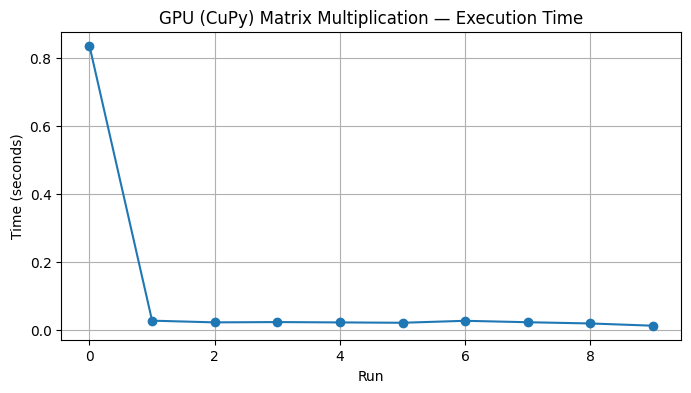

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import cupy as cp

N = 800

def matmul_gpu(A, B):
    A_gpu = cp.asarray(A)
    B_gpu = cp.asarray(B)
    C_gpu = A_gpu @ B_gpu
    return cp.asnumpy(C_gpu)

A = np.random.rand(N,N)
B = np.random.rand(N,N)

times = []

for i in range(10):
    t0 = time.time()
    C = matmul_gpu(A, B)
    t1 = time.time()
    times.append(t1 - t0)
    print(f"Run {i+1}: {t1 - t0:.6f} sec")

mean_time = sum(times)/len(times)
print("Mean GPU Time =", mean_time)

plt.figure(figsize=(8,4))
plt.plot(times, marker='o')
plt.title("GPU (CuPy) Matrix Multiplication — Execution Time")
plt.xlabel("Run")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

